In [56]:
   
#imports
import numpy as np
import matplotlib.pyplot as plt
from HopfieldNetwork import *
import random 
import matplotlib.animation as animation
from PIL import Image

pixels = 100
def MYIMGS_Hopfield(number_of_targetmemories): #test out the Hopfield_Network object on some MNIST data 
  n = number_of_targetmemories 
  #fetch MNIST dataset for some random memory downloads
  image = Image.open("puppy.jpg")
  image2 = Image.open("puppy2.jpg")
  image3 = Image.open("skull.jpg")
  image4 = Image.open("fox.jpg")
 
  new_image = image.resize((pixels,pixels)) 
  new_image2 = image2.resize((pixels,pixels))
  new_image3 = image3.resize((pixels,pixels))
  new_image4 = image4.resize((pixels,pixels))
  new_image = np.asarray(new_image.convert("L"))
  new_image2 = np.asarray(new_image2.convert("L"))
  new_image3 = np.asarray(new_image3.convert("L"))
  new_image4 = np.asarray(new_image4.convert("L"))
  
  new_image = new_image.reshape(1,-1) #tells it to make it one row and figure out how many columns it needs
  new_image2 = new_image2.reshape(1,-1)
  new_image3 = new_image3.reshape(1,-1)
  new_image4 = new_image4.reshape(1,-1)
  new_image = np.where(new_image>np.max(new_image)/1.6,1,-1)
  new_image2 = np.where(new_image2>np.max(new_image2)/1.6,1,-1)
  new_image3 = np.where(new_image3>np.max(new_image3)/2,1,-1)
  new_image4 = np.where(new_image4>np.max(new_image4)/1.2,1,-1)
  
  target_images = np.concatenate((new_image,new_image2,new_image3))
  # target_images = np.concatenate((new_image,new_image2,new_image3,new_image4))
  
  
  # target_images = np.where(target_images>np.max(target_images/1.6,1,-1))
  neurons = new_image.shape[1]


  unmoved_target_memories = np.empty([n,neurons])

  for i in range(n):
      unmoved_target_memories[i,:neurons] = target_images[i,:]


  return unmoved_target_memories, n


tm, n= MYIMGS_Hopfield(3) #returns target memories

In [59]:
scramble = 30 #percent scramble
initial = np.random.randint(-1,2,tm.shape[1]) #initializing random states (-1,0,1) for each neuron
initial[initial == 0] = -1 #replacing 0s with -1 for neuron states
initial_test = np.copy(tm[1,:])
def Run_BHN(number_of_neurons):
    H1=HopfieldNetwork(tm,tm,initial_test,scramble)
    cells, energy, singlestate,E2, unshifted_cells = H1.neuron_activation(number_of_neurons)
    return cells, energy, singlestate, E2, unshifted_cells

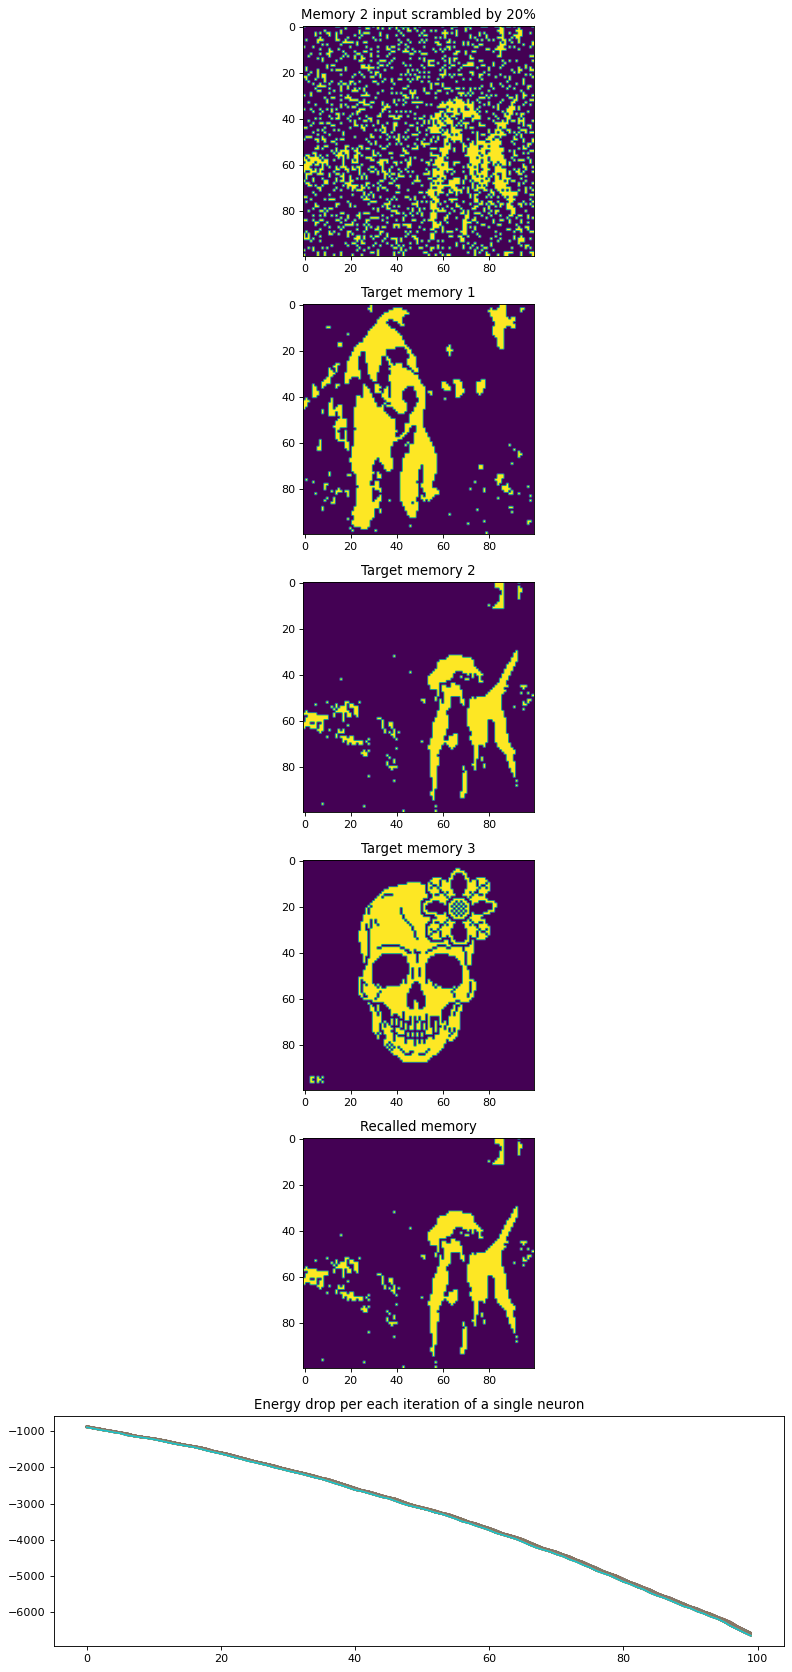

In [55]:

fig, ax = plt.subplots(6, 1, dpi=80, figsize=(10, 21)) #makes plots bigger by 7cm horizontal(3.5 x columns(2)) and 21cm vertical(3.5 x rows(6) = 21)
# plot initial scrambled image of target memory 2
Cells, _,_,_,_= Run_BHN(0)
ax[0].set_title(f"Memory 2 input scrambled by {scramble}%" )
ax[0].imshow(Cells.reshape(pixels,pixels))
#Target images
Cells, E1,_,E2,unshifted_cells = Run_BHN(pixels*pixels)
for i in range(tm.shape[0]):
    ax[i+1].set_title(f"Target memory {i+1}" )
    ax[i+1].imshow(tm[i,:].reshape(pixels,pixels))

#Recalled memory
ax[i+2].set_title("Recalled memory" )
ax[i+2].imshow(unshifted_cells.reshape(pixels,pixels))
ax[i+3].set_title("Energy drop per each iteration of a single neuron" )
ax[i+3].plot(E2.reshape(pixels,pixels))
fig.tight_layout()
plt.savefig('puppy_20%.png')

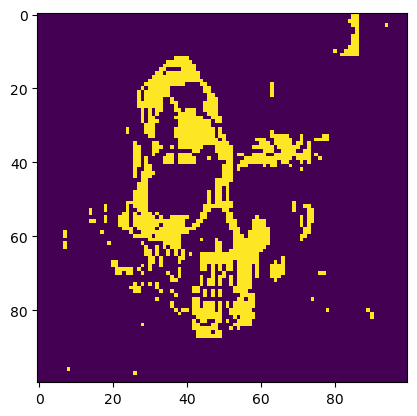

In [60]:
#Plotting the animation of the Binary Hopfield Network
cell_init, _, _,_,_ = Run_BHN(0) #setting initial background

fig, ax = plt.subplots()
ims = []
_,_,singlestate,_,_ = Run_BHN(pixels*pixels)
# singlestate.shape
# x = np.linspace(0,  singlestate.shape[0], )

for state in range(singlestate.shape[0]):
    
    im = ax.imshow(singlestate[state,:].reshape(pixels,pixels), animated = True)
    if state == 0:
        ax.imshow(cell_init.reshape(pixels,pixels))
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=2, blit = True)

ani.save("movie_puppy2.mp4")
plt.show() 
  
